<a href="https://colab.research.google.com/github/ru82bib/Kanizsa/blob/master/Python_for_R_Users_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Pandas Data Manipulation for R users

**Strongway, 2019**


This tutorial compares [pandas](http://pandas.pydata.org)
and [dplyr](http://cran.r-project.org/web/packages/dplyr/index.html), which is based on  [Tom Augspurger's notebook](http://nbviewer.jupyter.org/gist/TomAugspurger/6e052140eaa5fdb6e8c0), and some other tutorials (such as colab examples).

The comparison allow R users quickly get familar with Python data analysis. Correspondent R codes are in comments. 


`seaborn`, `matplotlib.pyplot` and `altair` provide plots for python. 

In [0]:
# Some prep work to get the data from R and into pandas
%matplotlib inline

# pandas for data process, seaborn for plotting, in addition, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

pd.set_option("display.max_rows", 5)

## 1. Basic Data types in Python

## Primitive variables

Primitive variables includes `integers`, `floats`,`strings`, `characters`, `booleans`.

using `type(var)` you can know the type of the variable. 

## Complex Variables

- **tuples**
    - An ordered sequence with a fixed number of elments. e.g., x = (1,2,3). It is immutable (i.e., values cannot be changed) 
- **lists**
    - An ordered sequence of items (array). Item values can be changed. For example, x = [1,2,3]
- **set**
    - An unordered collection of unique items. a = {1,2,3,6,5}
- **dictionary**
    - An unordered collection of key-value pairs, e.g., d = {'Female':1, 'Male':2}

**Note**: you can convert them by using their key words. For example

```python
dict([[1,2],[3,4]])
tuple({5,6,7})
```

## numpy array (matrix)

Numpy array accept `bool`, `int`,`float`,`complex` and more. 

## pandas table

Pandas store data in tables with column names and row index. This is very similar to the data.frame in R. In the following, we will focus on pandas table manipulation. 


## 2. External data in Colab Cloud

Colab provides cloud computing and collaboration with python notebook, but not natively for data sharing. Fortunately, there are several ways for sharing data. 

### Uploading files from your local file system

You share the data using other cloud methods, and then upload files locally. `files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name, the value is the data which was uploaded.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving README.md to README.md
User uploaded file "README.md" with length 397 bytes


Another example, upload a csv file and import as pandas table. 

In [0]:
import io
from google.colab import files

uploaded = files.upload()
key, value = uploaded.popitem()
df = pd.read_csv(io.BytesIO(value))
df.head()

Saving exp1.csv to exp1.csv


,Cond,rt,resp,spatial,feature,accuracy,subno,session
0,144,2.623047,1,1,0,0,10,1
1,160,1.958984,1,1,1,1,10,1
2,80,0.810547,0,0,0,1,10,1
3,160,0.748047,1,1,1,1,10,1
4,144,0.560547,1,1,0,0,10,1


### Downloading files to your local file system

`files.download` will invoke a browser download of the file to the user's local computer.


In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

### Mounting Google Drive locally

The example below shows how to mount your Google Drive in your virtual machine using an authorization code, and shows a couple of ways to write & read files there. Once executed, observe the new file (`foo.txt`) is visible in https://drive.google.com/

Note this only supports reading and writing files; to programmatically change sharing settings etc use one of the other options below.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

### use internet URL

If you store your data in some public available address, you can simply use URL to read in. 

In [0]:
url = 'https://raw.githubusercontent.com/berkgercek/visualsearch/master/data/exp1.csv'
dat = pd.read_csv(url)
dat.head()

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


## 3. Pandas Data Table Basic

read and explore pandas data table. 

### Shape, list rows

In [0]:
# dim(dat)   <--- The R code
dat.shape  # <--- The python code

(4620, 8)

To view the data, use `.head()` or `.tail()` function

In [0]:
# head(dat)
dat.tail()

,target,setsize,dyn,resp,rt,sub,exp,correct
4615,Present,16,Static,1,0.571045,11,1,1
4616,Absent,12,Static,2,1.100499,11,1,1
4617,Absent,8,Static,2,1.029907,11,1,1
4618,Absent,12,Static,2,0.994617,11,1,1
4619,Absent,16,Static,2,1.253425,11,1,1


__Your task:__ Please list the first 10 rows of the data. 

In [0]:
# your code here:

### __Solution__:

In [0]:
dat.head(10)

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
...,...,...,...,...,...,...,...,...
8,Absent,8,Static,2,1.406544,1,1,1
9,Present,12,Static,1,1.230085,1,1,1


### Statistical summary

In [0]:
# show some descriptive summary
# summary(dat)
dat.describe()

,setsize,resp,rt,sub,exp,correct
count,4620.0,4620.000000,4620.000000,4620.0,4620.0,4620.000000
mean,12.0,1.467965,1.530554,6.0,1.0,0.934416
...,...,...,...,...,...,...
75%,16.0,2.000000,1.994610,9.0,1.0,1.000000
max,16.0,2.000000,5.041658,11.0,1.0,1.000000


In [0]:
# unique(dat$Cond) <- R
dat.setsize.unique()

array([12,  8, 16])

In [0]:
dat['sub'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [0]:
type(dat.resp)

pandas.core.series.Series

## 4. Indexing, slicing and subsetting in Pandas

Indexing, slicing and subsettings are basic data manipulation. For example, we need to select specific subject for further data exploring, or we need to exclude error trials etc. 

### Doing in matlab way

Pandas is a matrix, so you can index using standard matlab way. 


In [0]:
# show the first 5 rows
dat[:5]

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


In [0]:
# select first 3 rows, first 3 columns
dat.iloc[:3,:3]

,target,setsize,dyn
0,Absent,12,Static
1,Absent,8,Static
2,Present,16,Static


In [0]:
# select target, setsize, and rt
dat.loc[:,['target','setsize','rt']].head()

,target,setsize,rt
0,Absent,12,2.583007
1,Absent,8,0.935967
2,Present,16,0.794771
3,Present,8,1.241838
4,Absent,12,1.759485


### Using query()

Pandas `query()` function is equivalent to `filter()` function in R. 

In [0]:
# select subject 1
dat.query('sub == 1')

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
...,...,...,...,...,...,...,...,...
418,Absent,12,Dynamic,2,2.677151,1,1,1
419,Present,16,Dynamic,1,1.241842,1,1,1


# Single table verbs (dplyr vs. pandas)

``dplyr`` has a small set of nicely defined verbs. I've listed their closest pandas verbs.


<table>
  <tr>
    <td><b>dplyr</b></td>
    <td><b>pandas</b></td>
  </tr>
  <tr>
    <td><code>filter()</code> (and <code>slice()</code>)</td>
    <td><code>query()</code> (and <code>loc[]</code>, <code>iloc[]</code>)</td>
  </tr>
  <tr>
    <td><code>arrange()</code></td>
    <td><code>sort_values</code> and <code>sort_index()</code></td>
  </tr>
  <tr>
  <td><code>select() </code>(and <code>rename()</code>)</td>
    <td><code>__getitem__ </code> (and <code>rename()</code>)</td>
  </tr>
  <tr>
  <td><code>distinct()</code></td>
    <td><code>drop_duplicates()</code></td>
  </tr>
  <tr>
    <td><code>mutate()</code> (and <code>transmute()</code>)</td>
    <td>assign</td>
  </tr>
  <tr>
    <td>summarise()</td>
    <td>None</td>
  </tr>
  <tr>
    <td>sample_n() and sample_frac()</td>
    <td><code>sample</code></td>
  </tr>
  <tr>
    <td><code>%>%</code></td>
    <td><code>pipe</code></td>
  </tr>

</table>


Some of the "missing" verbs in pandas are because there are other, different ways of achieving the same goal. For example `summarise` is spread across `mean`, `std`, etc. It's closest analog is actually the `.agg` method on a `GroupBy` object, as it reduces a DataFrame to a single row (per group). This isn't quite what `.describe` does.

I've also included the `pipe` operator from R (`%>%`), the `pipe` method from pandas, even though it isn't quite a verb.

# Filter rows with filter(), query()

In [0]:
dat.query("setsize == 12 & sub == 10 & correct == 1")

,target,setsize,dyn,resp,rt,sub,exp,correct
3780,Absent,12,Static,2,2.779448,10,1,1
3783,Absent,12,Static,2,1.218132,10,1,1
...,...,...,...,...,...,...,...,...
4198,Present,12,Dynamic,1,0.794616,10,1,1
4199,Absent,12,Dynamic,2,1.324017,10,1,1


We see the first big *language* difference between R and python.
Many python programmers will shun the R code as too magical.
How is the programmer supposed to know that `month` and `day` are supposed to represent columns in the DataFrame?
On the other hand, to emulate this *very* convenient feature of R, python has to write the expression as a string, and evaluate the string in the context of the DataFrame.

The more verbose version:

In [0]:
dat[(dat.setsize == 12) & (dat.sub == 10)]

,target,setsize,dyn,resp,rt,sub,exp,correct


# Arrange rows with arrange(), sort()

In [0]:
# arrange(data, sub, setsize) 
dat.sort_values(['sub', 'setsize'])

,target,setsize,dyn,resp,rt,sub,exp,correct
1,Absent,8,Static,2,0.935967,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
...,...,...,...,...,...,...,...,...
4615,Present,16,Static,1,0.571045,11,1,1
4619,Absent,16,Static,2,1.253425,11,1,1


In [0]:
# arrange(data, desc(sub))
dat.sort_values('sub', ascending=False)

,target,setsize,dyn,resp,rt,sub,exp,correct
4619,Absent,16,Static,2,1.253425,11,1,1
4356,Present,16,Static,1,1.218113,11,1,1
...,...,...,...,...,...,...,...,...
287,Present,16,Dynamic,2,2.912484,1,1,0
0,Absent,12,Static,2,2.583007,1,1,1


It's worth mentioning the other common sorting method for pandas DataFrames, `sort_index`. Pandas puts much more emphasis on indicies, (or row labels) than R.
This is a design decision that has positives and negatives, which we won't go into here. Suffice to say that when you need to sort a `DataFrame` by the index, use `DataFrame.sort_index`.

# Select columns with select(), []

In [0]:
# select(data, subno, Cond, rt) 
dat[['sub', 'setsize', 'rt']]

,sub,setsize,rt
0,1,12,2.583007
1,1,8,0.935967
...,...,...,...
4618,11,12,0.994617
4619,11,16,1.253425


# Rename

Similar to `.replace()`, `.rename()` function also copies the data and return a new object. So you need to store it in a new object. 

In [0]:
ndata = dat.rename(columns={'dyn': 'Display'})
ndata.head()

,target,setsize,Display,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


Pandas is more verbose, but the the argument to `columns` can be any mapping. So it's often used with a function to perform a common task, say `df.rename(columns=lambda x: x.replace('-', '_'))` to replace any dashes with underscores. Also, ``rename`` (the pandas version) can be applied to the Index.

One more note on the differences here.
Pandas could easily include a `.select` method.
[`xray`](http://xray.readthedocs.org/en/stable/), a library that builds on top of NumPy and pandas to offer labeled N-dimensional arrays (along with many other things) does [just that](http://xray.readthedocs.org/en/stable/indexing.html#indexing-with-labeled-dimensions).
Pandas chooses the `.loc` and `.iloc` accessors because *any valid selection is also a valid assignment*. This makes it easier to modify the data.

```python
flights.loc[:, 'year':'day'] = data
```

where `data` is an object that is, or can be broadcast to, the correct shape.

# Extract distinct (unique) rows 

In the above explorative data anlysis we have already used this function. 

In [0]:
# distinct(select(data, subno))
dat.setsize.unique()

array([12,  8, 16])

FYI this returns a numpy array instead of a Series.

In [0]:
# distinct(select(ndata, position, dimension))
ndata[['position', 'dimension']].drop_duplicates()

,position,dimension
0,Right,Color
1,Right,Orientation
2,Left,Color
7,Left,Orientation


OK, so ``dplyr`` wins there from a consistency point of view. ``unique`` is only defined on Series, not DataFrames.

# Add new columns with mutate() 

We at pandas shamelessly stole this for [v0.16.0](http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#whatsnew-0160-enhancements-assign).

In Pandas, you need explicitly express column from which dataframe. 

In [0]:
# mutate(ndata,rtms = rt*1000)

ndata.assign(rtms=ndata.rt*1000)

,Cond,rt,resp,position,dimension,accuracy,subno,session,rtms
0,ColorRight,2.623047,1,Right,Color,0,10,1,2623.046875
1,OrienRight,1.958984,1,Right,Orientation,1,10,1,1958.984375
...,...,...,...,...,...,...,...,...,...
9598,OrienRight,1.398438,1,Right,Orientation,1,8,3,1398.437500
9599,OrienLeft,0.529297,1,Left,Orientation,1,8,3,529.296875


In [0]:
# mutate(ndata,
#   rtms = rt*1000,
#   inv_rt = 1/rtms
# )

ndata.assign(rtms=ndata.rt*1000).assign(inv_rt = lambda df: 1/df.rtms)

,Cond,rt,resp,position,dimension,accuracy,subno,session,rtms,inv_rt
0,ColorRight,2.623047,1,Right,Color,0,10,1,2623.046875,0.000381
1,OrienRight,1.958984,1,Right,Orientation,1,10,1,1958.984375,0.000510
...,...,...,...,...,...,...,...,...,...,...
9598,OrienRight,1.398438,1,Right,Orientation,1,8,3,1398.437500,0.000715
9599,OrienLeft,0.529297,1,Left,Orientation,1,8,3,529.296875,0.001889


The first example is pretty much identical (aside from the names, `mutate` vs. `assign`).

The second example just comes down to language differences. In `R`, it's possible to implement a function like `mutate` where you can refer to `gain` in the line calcuating `gain_per_hour`, even though `gain` hasn't actually been calcuated yet.

In Python, you can have arbitrary keyword arguments to functions (which we needed for `.assign`), but the order of the argumnets is arbitrary since `dict`s are unsorted and `**kwargs*` is a `dict`. So you can't have something like `df.assign(x=df.a / df.b, y=x **2)`, because you don't know whether `x` or `y` will come first (you'd also get an error saying `x` is undefined.

To work around that with pandas, you'll need to split up the assigns, and pass in a *callable* to the second assign. The callable looks at itself to find a column named `gain`. Since the line above returns a DataFrame with the `gain` column added, the pipeline goes through just fine.

# Summarise values with summarise()

In [0]:
# summarise(ndata,
#   rt = mean(rt, na.rm = TRUE))
ndata.rt.mean()

0.5666471354166667

This is only roughly equivalent.
`summarise` takes a callable (e.g. `mean`, `sum`) and evaluates that on the DataFrame. In pandas these are spread across `pd.DataFrame.mean`, `pd.DataFrame.sum`. This will come up again when we look at `groupby`.

# Randomly sample rows with sample_n() and sample_frac()

In [0]:
# sample_n(data, 10)
data.sample(n=10)

,Cond,rt,resp,spatial,feature,accuracy,subno,session
3360,ColorLeft,0.966797,0,Left,Color,1,3,3
3173,OrienLeft,0.683594,1,Left,Orientation,1,3,2
...,...,...,...,...,...,...,...,...
9077,ColorRight,0.591797,0,Right,Color,1,8,2
7871,ColorLeft,0.498047,0,Left,Color,1,7,2


In [0]:
# sample_frac(data, 0.01)
data.sample(frac=.01)

,Cond,rt,resp,spatial,feature,accuracy,subno,session
2068,OrienLeft,0.716797,1,Left,Orientation,1,11,3
8935,ColorRight,0.654297,0,Right,Color,1,8,2
...,...,...,...,...,...,...,...,...
5062,ColorRight,0.841797,0,Right,Color,1,5,1
5732,OrienLeft,0.873047,1,Left,Orientation,1,5,3


# Grouped operations 

Pandas uses `.groupby()` function, very much like dplyr::group_by. 

But you need to aware that pandas `.groupby()` will **<font color = 'red'>put grouped variables into multi-index</font>**, so the columns after grouping will not include those grouped variables. If you want to put them back **as columns** for later usage, you need to add **`.reset_index()`**. 

In [0]:
# ndata %>% filter(accuracy==1) %>% 
#     group_by(subno, session, dimension) %>% 
#     summarise(count=n(), rt = mean(rt), se = sd(rt)/sqrt(n-1))

mrt = ndata.query('accuracy == 1')\
    .groupby(['subno','session','dimension'])\
    .agg({"resp":"count",
         "rt":"mean"})\
    .rename(columns={"resp":"count"})\
    .reset_index()
mrt.head()

,subno,session,dimension,rt,count
0,3,1,Color,0.569287,299
1,3,1,Orientation,0.629269,97
2,3,2,Color,0.794291,96
3,3,2,Orientation,0.686033,293
4,3,3,Color,0.632128,197


Note, when python chains span over multiple lines, take care the indentation and add one '\' at the previous line. 

I think pandas is more difficult for this particular example.
There isn't as natural a way to mix column-agnostic aggregations (like ``count``) with column-specific aggregations like the other two. You end up writing could like `.agg{'resp': 'count'}` which reads, "I want the count of `resp`", even though you don't care about `resp` specifically. You could just as easily have said `.agg('Cond': 'count')`.
Additionally assigning names can't be done as cleanly in pandas; you have to just follow it up with a ``rename`` like before.

The result is a `MultiIndex` in the columns which can be a bit awkard to work with (you can drop a level with `r.columns.droplevel()`). But `MultiIndex` has its own purpose, such as subsecting data. 

In [0]:
# use multiindex to subsecting data
mrt = ndata.query('accuracy == 1')\
    .groupby(['subno','session','dimension'])\
    .agg({"resp":"count",
         "rt":"mean"})\
    .rename(columns={"resp":"count"})
# see the 'multi-index'
mrt.head()

rt  count
subno session dimension                   
3     1       Color        0.569287    299
              Orientation  0.629269     97
      2       Color        0.794291     96
              Orientation  0.686033    293
      3       Color        0.632128    197

In [0]:
# use 'multi-index' to select subset data
# get out subno of 3.
mrt.loc[3]

rt  count
session dimension                   
1       Color        0.569287    299
        Orientation  0.629269     97
...                       ...    ...
3       Color        0.632128    197
        Orientation  0.662747    196

[6 rows x 2 columns]

<font color = 'blue'>

**Note**:

- Pandas use `.loc()` and `.iloc()` to retrieve selected rows. The former uses named index, and the latter uses number index.  
- By default, `data['column_name']` select columns. 

In [0]:
# get subno 8, session 2, Color target
# use tuple (8,2,'Color')
mrt.loc[(3,2)]

,rt,count
dimension,,
Color,0.794291,96
Orientation,0.686033,293


Similar to how ``dplyr`` provides optimized C++ versions of most of the `summarise` functions, pandas uses [cython](http://cython.org) optimized versions for most of the `agg` methods.

# Chaining

I have used chaining in the above examples. More specifically, chaining is a concatenation of functions from left to right, very much like R `%>%`. 

In [0]:
mrt = ndata.query('accuracy == 1')\
    .groupby(['subno','session','dimension'])\
    .agg({"resp":"count",
         "rt":"mean"})\
    .rename(columns={"resp":"count"})\
    .reset_index()

A bit of soapboxing here if you'll indulge me.

The example above is a bit contrived since it only uses methods on `DataFrame`. But what if you have some function to work into your pipeline that pandas hasn't (or won't) implement? In that case you're required to break up your pipeline by assigning your intermediate (probably uninteresting) DataFrame to a temporary variable you don't actually care about.

`R` doesn't have this problem since the `%>%` operator works with any function that takes (and maybe returns) DataFrames.
The python language doesn't have any notion of right to left function application (other than special cases like `__radd__` and `__rmul__`).
It only allows the usual left to right `function(arguments)`, where you can think of the `()` as the "call this function" operator.

Pandas wanted something like `%>%` and we did it in a farily pythonic way. The `pd.DataFrame.pipe` method takes a function and optionally some arguments, and calls that function with `self` (the DataFrame) as the first argument.

So

```R
data >%> my_function(my_argument=10)
```

becomes

```python
data.pipe(my_function, my_argument=10)
```

We initially had grander visions for `.pipe`, but the wider python community didn't seem that interested.

# Plotting

We may as well reproduce the graph. It looks like `ggplots` `geom_smooth` is some kind of lowess smoother. We can either us [seaborn](http://stanford.edu/~mwaskom/software/seaborn/):

In [0]:
mrt.head()

,subno,session,dimension,rt,count
0,3,1,Color,0.569287,299
1,3,1,Orientation,0.629269,97
2,3,2,Color,0.794291,96
3,3,2,Orientation,0.686033,293
4,3,3,Color,0.632128,197


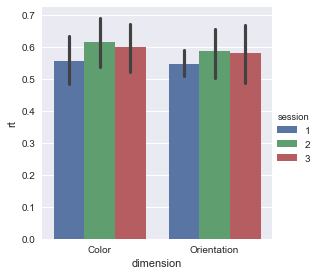

In [0]:
sns.set()
sns.factorplot(x ='dimension', y = "rt", hue = "session", data=mrt, kind = 'bar')

# Summary

I think pandas held up pretty well, considering this was a vignette written for dplyr. I found the degree of similarity more interesting than the differences. The most difficult task was renaming of columns within an operation; they had to be followed up with a call to ``rename`` *after* the operation, which isn't that burdensome honestly.

More and more it looks like we're moving towards future where being a language or package partisan just doesn't make sense. Not when you can load up a [Jupyter](http://jupyter.org) (formerly IPython) notebook to call up a library written in R, and hand those results off to python or Julia or whatever for followup, before going back to R to make a cool [shiny](http://shiny.rstudio.com) web app.

There will always be a place for your "utility belt" package like dplyr or pandas, but it wouldn't hurt to be familiar with both.

If you want to contribute to pandas, we're always looking for help at https://github.com/pydata/pandas/.
